In [48]:
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split,learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda,MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.models import Sequential, model_from_json
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D,MaxPool2D,MaxPooling2D,AvgPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#from keras.applications.mobilenet import MobileNet
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
#from sklearn.metrics import auc
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [49]:
train_dir = "../input/kermany2018/OCT2017 /train"
test_dir = "../input/kermany2018/OCT2017 /test"

In [50]:
for dirpath, dirname, filenames in os.walk("dataset"):
    print(f"There are {len(dirname)} directories and there are {len(filenames)} images in {dirpath}")

There are 2 directories and there are 0 images in dataset
There are 4 directories and there are 0 images in dataset/test
There are 0 directories and there are 3000 images in dataset/test/DRUSEN
There are 0 directories and there are 3000 images in dataset/test/NORMAL
There are 0 directories and there are 3000 images in dataset/test/CNV
There are 0 directories and there are 3000 images in dataset/test/DME
There are 4 directories and there are 0 images in dataset/train
There are 0 directories and there are 5000 images in dataset/train/DRUSEN
There are 0 directories and there are 5000 images in dataset/train/NORMAL
There are 0 directories and there are 5000 images in dataset/train/CNV
There are 0 directories and there are 5000 images in dataset/train/DME


In [51]:
!mkdir "dataset"
!mkdir "dataset/train"
!mkdir "dataset/test"
!mkdir "dataset/train/CNV"
!mkdir "dataset/train/DRUSEN"
!mkdir "dataset/train/DME"
!mkdir "dataset/train/NORMAL"
!mkdir "dataset/test/CNV"
!mkdir "dataset/test/DRUSEN"
!mkdir "dataset/test/DME"
!mkdir "dataset/test/NORMAL"

mkdir: cannot create directory ‘dataset’: File exists
mkdir: cannot create directory ‘dataset/train’: File exists
mkdir: cannot create directory ‘dataset/test’: File exists
mkdir: cannot create directory ‘dataset/train/CNV’: File exists
mkdir: cannot create directory ‘dataset/train/DRUSEN’: File exists
mkdir: cannot create directory ‘dataset/train/DME’: File exists
mkdir: cannot create directory ‘dataset/train/NORMAL’: File exists
mkdir: cannot create directory ‘dataset/test/CNV’: File exists
mkdir: cannot create directory ‘dataset/test/DRUSEN’: File exists
mkdir: cannot create directory ‘dataset/test/DME’: File exists
mkdir: cannot create directory ‘dataset/test/NORMAL’: File exists


In [52]:
import shutil
for folder in os.listdir(train_dir):
    for file in os.listdir(train_dir + '/' + folder):
        if folder == "CNV":
            if len(os.listdir("dataset/train/CNV")) < 5000:
                shutil.copy(train_dir + '/' + folder + '/' + file, "dataset/train/CNV")
            else:
                break
        elif folder == "DRUSEN":
            if len(os.listdir("dataset/train/DRUSEN")) < 5000:
                shutil.copy(train_dir + '/' + folder + '/' + file, "dataset/train/DRUSEN")
            else:
                break
        elif folder == "DME":
            if len(os.listdir("dataset/train/DME")) < 5000:
                shutil.copy(train_dir + '/' + folder + '/' + file, "dataset/train/DME")
            else:
                break
        elif folder == "NORMAL":
            if len(os.listdir("dataset/train/NORMAL")) < 5000:
                shutil.copy(train_dir + '/' + folder + '/' + file, "dataset/train/NORMAL")
            else:
                break

In [53]:
for dirpath, dirname, filenames in os.walk("dataset"):
    print(f"There are {len(dirname)} directories and there are {len(filenames)} images in {dirpath}")

There are 2 directories and there are 0 images in dataset
There are 4 directories and there are 0 images in dataset/test
There are 0 directories and there are 3000 images in dataset/test/DRUSEN
There are 0 directories and there are 3000 images in dataset/test/NORMAL
There are 0 directories and there are 3000 images in dataset/test/CNV
There are 0 directories and there are 3000 images in dataset/test/DME
There are 4 directories and there are 0 images in dataset/train
There are 0 directories and there are 5000 images in dataset/train/DRUSEN
There are 0 directories and there are 5000 images in dataset/train/NORMAL
There are 0 directories and there are 5000 images in dataset/train/CNV
There are 0 directories and there are 5000 images in dataset/train/DME


In [54]:
for folder in os.listdir(train_dir):
    for file in os.listdir(train_dir + '/' + folder)[5000:8000]:
        if folder == "CNV":
                shutil.copy(train_dir + '/' + folder + '/' + file, "dataset/test/CNV")
        elif folder == "DRUSEN":
                shutil.copy(train_dir + '/' + folder + '/' + file, "dataset/test/DRUSEN")
        elif folder == "DME":
                shutil.copy(train_dir + '/' + folder + '/' + file, "dataset/test/DME")
        elif folder == "NORMAL":
                shutil.copy(train_dir + '/' + folder + '/' + file, "dataset/test/NORMAL")

In [55]:
for dirpath, dirname, filenames in os.walk("dataset"):
    print(f"There are {len(dirname)} directories and there are {len(filenames)} images in {dirpath}")

There are 2 directories and there are 0 images in dataset
There are 4 directories and there are 0 images in dataset/test
There are 0 directories and there are 3000 images in dataset/test/DRUSEN
There are 0 directories and there are 3000 images in dataset/test/NORMAL
There are 0 directories and there are 3000 images in dataset/test/CNV
There are 0 directories and there are 3000 images in dataset/test/DME
There are 4 directories and there are 0 images in dataset/train
There are 0 directories and there are 5000 images in dataset/train/DRUSEN
There are 0 directories and there are 5000 images in dataset/train/NORMAL
There are 0 directories and there are 5000 images in dataset/train/CNV
There are 0 directories and there are 5000 images in dataset/train/DME


In [56]:
import tensorflow as tf
train_data = tf.keras.preprocessing.image_dataset_from_directory("dataset/train",
                                                                image_size = (224, 224),
                                                                label_mode = "categorical",
                                                                shuffle = True)
test_data = tf.keras.preprocessing.image_dataset_from_directory("dataset/test",
                                                                image_size = (224, 224),
                                                                label_mode = "categorical",
                                                                shuffle = False)
train_data, test_data

Found 20000 files belonging to 4 classes.
Found 12000 files belonging to 4 classes.


(<BatchDataset shapes: ((None, 224, 224, 3), (None, 4)), types: (tf.float32, tf.float32)>,
 <BatchDataset shapes: ((None, 224, 224, 3), (None, 4)), types: (tf.float32, tf.float32)>)

In [57]:
train_dataset = train_data.prefetch(tf.data.AUTOTUNE)
test_dataset = test_data.prefetch(tf.data.AUTOTUNE)
train_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 224, 224, 3), (None, 4)), types: (tf.float32, tf.float32)>,
 <PrefetchDataset shapes: ((None, 224, 224, 3), (None, 4)), types: (tf.float32, tf.float32)>)

In [58]:
tf.random.set_seed(42)

In [59]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3),  activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3),  activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3),  activation="relu"))
#model.add(Conv2D(filters=128, kernel_size=(3,3),  activation="relu"))
#model.add(Conv2D(filters=128, kernel_size=(3,3),  activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3),  activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3),  activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3),  activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3),  activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3),  activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3),  activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(units=64,activation="relu"))
model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=4, activation="softmax"))

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 222, 222, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 109, 109, 128)     73856     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 107, 107, 128)     147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 53, 53, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 51, 51, 128)      

In [61]:
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [62]:
model.compile(loss = "categorical_crossentropy", optimizer = "Adam", metrics = ["accuracy",sensitivity,specificity])

model_history = model.fit(train_dataset,
                         epochs = 10,
                         validation_data = test_dataset)

Epoch 1/10
625/625 [==============================] - 100s 158ms/step - loss: 1.0508 - accuracy: 0.5597 - sensitivity: 0.3925 - specificity: 0.9551 - val_loss: 0.7690 - val_accuracy: 0.7067 - val_sensitivity: 0.6013 - val_specificity: 0.9403
Epoch 2/10
625/625 [==============================] - 99s 157ms/step - loss: 0.4763 - accuracy: 0.8306 - sensitivity: 0.8023 - specificity: 0.9543 - val_loss: 0.4113 - val_accuracy: 0.8568 - val_sensitivity: 0.8457 - val_specificity: 0.9572
Epoch 3/10
625/625 [==============================] - 98s 157ms/step - loss: 0.3425 - accuracy: 0.8824 - sensitivity: 0.8693 - specificity: 0.9657 - val_loss: 0.3298 - val_accuracy: 0.8838 - val_sensitivity: 0.8748 - val_specificity: 0.9658
Epoch 4/10
625/625 [==============================] - 98s 156ms/step - loss: 0.2953 - accuracy: 0.8986 - sensitivity: 0.8888 - specificity: 0.9698 - val_loss: 0.3029 - val_accuracy: 0.8969 - val_sensitivity: 0.8849 - val_specificity: 0.9698
Epoch 5/10
625/625 [===============

In [63]:
history = model.history.history
def plot_metrics(history):
  
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    train_sensitivity = history['sensitivity']
    train_specificity = history['specificity']
    val_sensitivity = history['val_sensitivity']
    val_specificity = history['val_specificity']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()
    
    # sensitivity
    plt.figure()
    plt.plot(train_sensitivity, label='Training sensitivity')
    plt.plot( val_sensitivity, label='Validation sensitivity')
    plt.title('sensitivity')
    plt.ylabel('sensitivity')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()
    
     # specificity
    plt.figure()
    plt.plot(train_specificity, label='Training specificity')
    plt.plot(val_specificity, label='Validation specificity')
    plt.title('specificity')
    plt.ylabel('specificity')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()

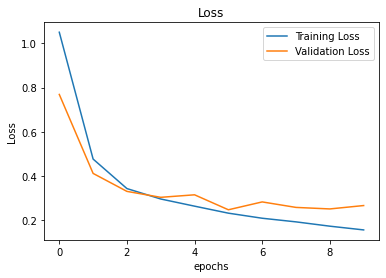

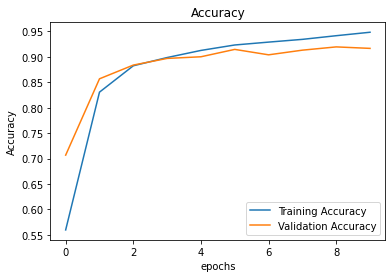

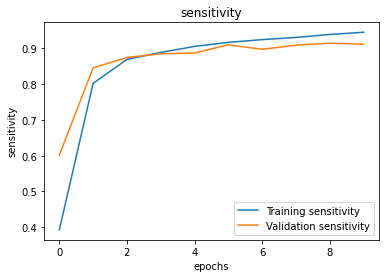

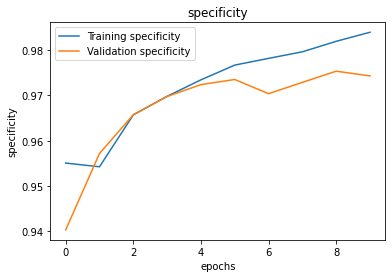

In [64]:
plot_metrics(history)

In [65]:
model.evaluate(test_dataset)

375/375 [==============================] - 23s 62ms/step - loss: 0.2657 - accuracy: 0.9167 - sensitivity: 0.9118 - specificity: 0.9743


[0.2656767964363098,
 0.9166666865348816,
 0.9117500185966492,
 0.9743056893348694]

In [66]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  #"""Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channel)."""
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  #img = img/255.
  return img

In [67]:
class_names = train_data.class_names
print(class_names)

['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [68]:
def pred_and_plot(model, filename, class_names):
  #"""Imports an image located at filename, makes a prediction on it with a trained model and plots the image with the predicted class as the title."""
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)
  plt.imshow(img/255.)
  plt.show()
  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(pred, tf.argmax(pred, axis = 1))
  # Get the predicted class
  pred_class = class_names[tf.argmax(pred, axis = 1).numpy()[0]]
  # Plot the image and predicted class
  plt.imshow(img/255.)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

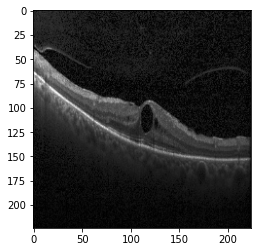

[[4.8657599e-05 9.9994338e-01 4.3583100e-08 7.9519805e-06]] tf.Tensor([1], shape=(1,), dtype=int64)


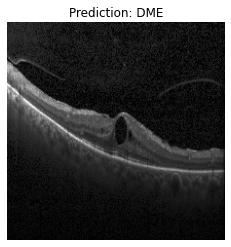

In [69]:
file_name1="../input/kermany2018/OCT2017 /val/DME/DME-9583225-1.jpeg"
pred_and_plot(model,file_name1,class_names)

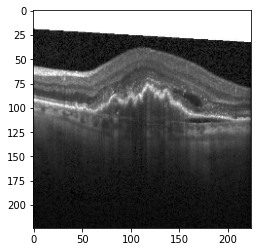

[[9.9885094e-01 5.7292564e-06 1.1428135e-03 5.6825104e-07]] tf.Tensor([0], shape=(1,), dtype=int64)


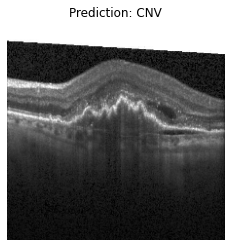

In [76]:
file_name2="../input/kermany2018/OCT2017 /val/CNV/CNV-6294785-1.jpeg"
pred_and_plot(model,file_name2,class_names)

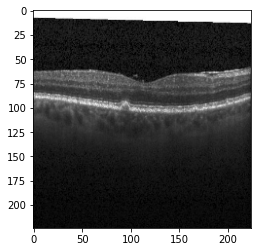

[[1.03135705e-02 3.65930202e-04 9.89315629e-01 4.82089263e-06]] tf.Tensor([2], shape=(1,), dtype=int64)


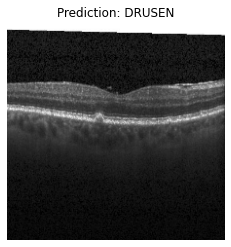

In [71]:
file_name3="../input/kermany2018/OCT2017 /val/DRUSEN/DRUSEN-9861332-1.jpeg"
pred_and_plot(model,file_name3,class_names)

In [72]:
pred_probs = model.predict(test_data, verbose=1)
pred_probs[0], pred_probs[0].argmax

375/375 [==============================] - 20s 54ms/step


(array([9.9895954e-01, 8.7411271e-04, 1.1791224e-04, 4.8459202e-05],
       dtype=float32),
 <function ndarray.argmax>)

In [73]:
pred_classes = pred_probs.argmax(axis=1)
pred_classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [74]:
y_labels = []
for images, labels in test_data.unbatch(): # unbatch the test data and get images and labels
    y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
y_labels[:10] # check what they look like (unshuffled)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

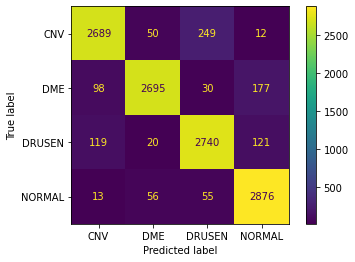

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_labels, pred_classes, labels = [0, 1, 2, 3])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = train_data.class_names)
disp.plot()